# Laporan Proyek Machine Learning - Rosyd Panjie Laras

## Project Overview
Deteksi dini kondisi kesehatan janin sangat penting dalam konteks perawatan ibu hamil karena membantu mencegah potensi risiko dan komplikasi yang dapat membahayakan kesehatan ibu dan janin. Janin dalam kandungan rentan terhadap berbagai faktor risiko dan perubahan kondisi yang dapat mempengaruhi kesehatannya. Dengan mendeteksi masalah kesehatan janin secara dini, tenaga medis dapat mengambil langkah-langkah yang tepat untuk mengurangi risiko dan mengoptimalkan perawatan.

Ketika masalah kesehatan janin terdeteksi lebih awal, intervensi medis yang tepat waktu dapat dilakukan. Misalnya, jika terjadi fluktuasi abnormal dalam detak jantung janin atau aktivitas gerakan, tenaga medis dapat melakukan evaluasi lebih lanjut atau mengambil langkah-langkah korektif untuk menghindari komplikasi lebih lanjut. Deteksi dini juga memungkinkan penilaian kondisi kesehatan ibu hamil secara keseluruhan, sehingga tindakan yang sesuai dapat diambil untuk menjaga kesehatan dan kenyamanannya.

Selain itu, model ini juga dapat meningkatkan komunikasi antara pasien dan tenaga medis, memberikan pemahaman yang lebih baik tentang kondisi kesehatan janin, dan membantu ibu hamil dalam mengambil keputusan yang tepat untuk kesejahteraan mereka dan bayi yang akan lahir. 

## Business Understanding

### Problem Statements
- Bagaimana cara mengembangkan model machine learning yang memiliki kemampuan untuk mendeteksi dini kondisi kesehatan janin berdasarkan data medis yang tersedia ?

### Goals
Tujuan utama dari proyek ini adalah menciptakan model klasifikasi yang mampu mengenali berbagai kondisi kesehatan janin, seperti risiko gagal jantung, dengan memanfaatkan fitur-fitur medis yang terdapat dalam dataset. Dengan hadirnya model ini, diharapkan tenaga medis mampu mengambil langkah pencegahan atau intervensi yang lebih awal dan lebih tepat.

### Solution Approach
Solusi yang diajukan dalam proyek ini mencakup langkah-langkah berikut:

- Pengumpulan dan Pembersihan Data: Langkah awal melibatkan pengumpulan dataset yang berisi data medis terkait kesehatan janin. Data tersebut akan menjelaskan informasi klinis dan fisiologis yang relevan, seperti denyut jantung janin, gerakan janin, tekanan darah ibu, dan elemen lainnya. Data ini kemudian akan dibersihkan dengan mengatasi nilai kosong atau outliers.

- Teknik Preprocessing: Preprocessing dilakukan untuk memastikan data siap digunakan dalam melatih dan menguji model. Tahapan ini mencakup pembersihan data dengan menghapus nilai-nilai yang tidak valid dan penanganan outliers.

- Pengembangan Model Klasifikasi: Model klasifikasi akan dibangun menggunakan algoritma machine learning yang telah dipilih yaitu K-Nearest Neighbors (KNN), Random Forest, dan Decision Tree yang sesuai dengan karakteristik dan kebutuhan masalah deteksi kesehatan janin.

- Pelatihan Model: Model akan dilatih menggunakan data pelatihan dengan menerapkan Stratified K-Fold cross-validation, sambil menjalani proses GridSearch untuk mencari kombinasi optimal dari hyperparameter. Hal ini bertujuan untuk mengoptimalkan performa model dengan memilih konfigurasi hyperparameter yang terbaik dan menghindari bias serta varian yang tidak diinginkan.

- Evaluasi Model: Performa model akan dievaluasi menggunakan metrik-metrik seperti akurasi, presisi, recall, dan F1-score dengan menggunakan data pengujian.

### Import Libraries

In [15]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import seaborn as sns

### Read Datasets

In [16]:
df = pd.read_csv('fetal_health.csv')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

Feature

- 'baseline value': Baseline FHR (denyut jantung janin) (ketukan per menit)
- 'accelerations': Jumlah percepatan per detik
- 'fetal_movement': Jumlah gerakan janin per detik
- 'uterine_contractions': Jumlah kontraksi rahim per detik
- 'light_decelerations': Jumlah penurunan ringan per detik
- 'severe_decelerations': Jumlah penurunan berat per detik
- 'prolongued_decelerations': Jumlah penurunan berkepanjangan per detik
- 'abnormal_short_term_variability': Persentase waktu dengan variasi jangka pendek yang abnormal
- 'mean_value_of_short_term_variability': Nilai rata-rata variasi jangka pendek
- 'percentage_of_time_with_abnormal_long_term_variability': Persentase waktu dengan variasi jangka panjang yang abnormal
- 'mean_value_of_long_term_variability': Nilai rata-rata variasi jangka panjang
- 'histogram_width': Lebar histogram FHR
- 'histogram_min': Minimum (frekuensi rendah) dari histogram FHR
- 'histogram_max': Maksimum (frekuensi tinggi) dari histogram FHR
- 'histogram_number_of_peaks': Jumlah puncak dalam histogram
- 'histogram_number_of_zeroes': Jumlah nol dalam histogram
- 'histogram_mode': Modus histogram
- 'histogram_mean': Rata-rata histogram
- 'histogram_median': Median histogram
- 'histogram_variance': Variansi histogram
- 'histogram_tendency': Kecenderungan histogram
Target:

- 'fetal_health': Diberi label sebagai 1 (Normal), 2 (Sangat Diduga), dan 3 (Patologis)

In [18]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [19]:
print(f"Dataset size: {df.shape}")

Dataset size: (2126, 22)


### Data Visualization

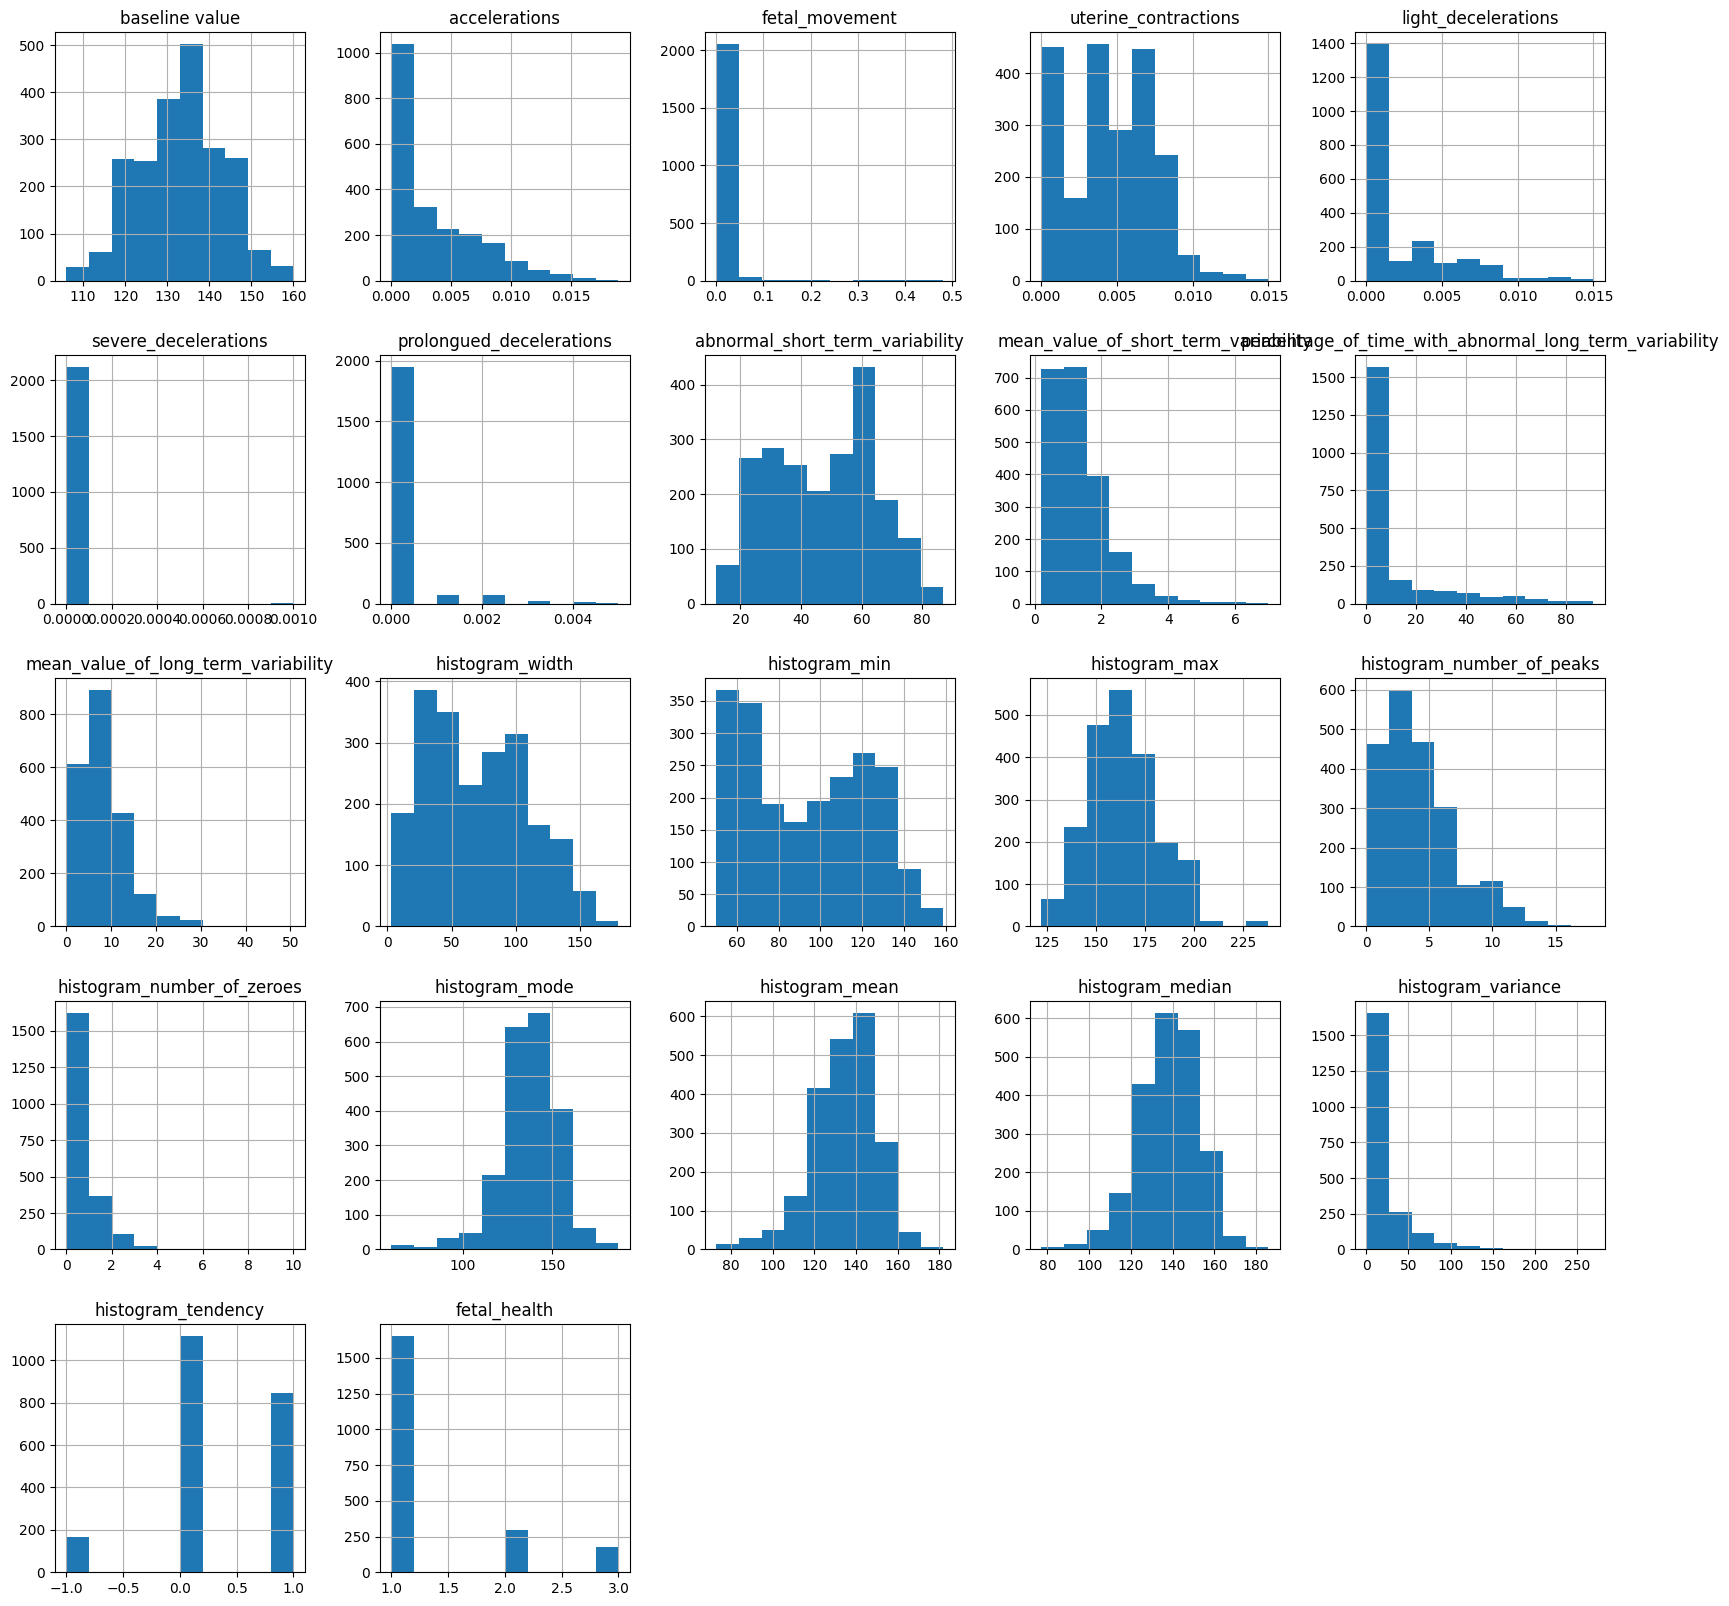

In [20]:
# Feature Distribution
hist_plot = df.hist(figsize = (20,20))

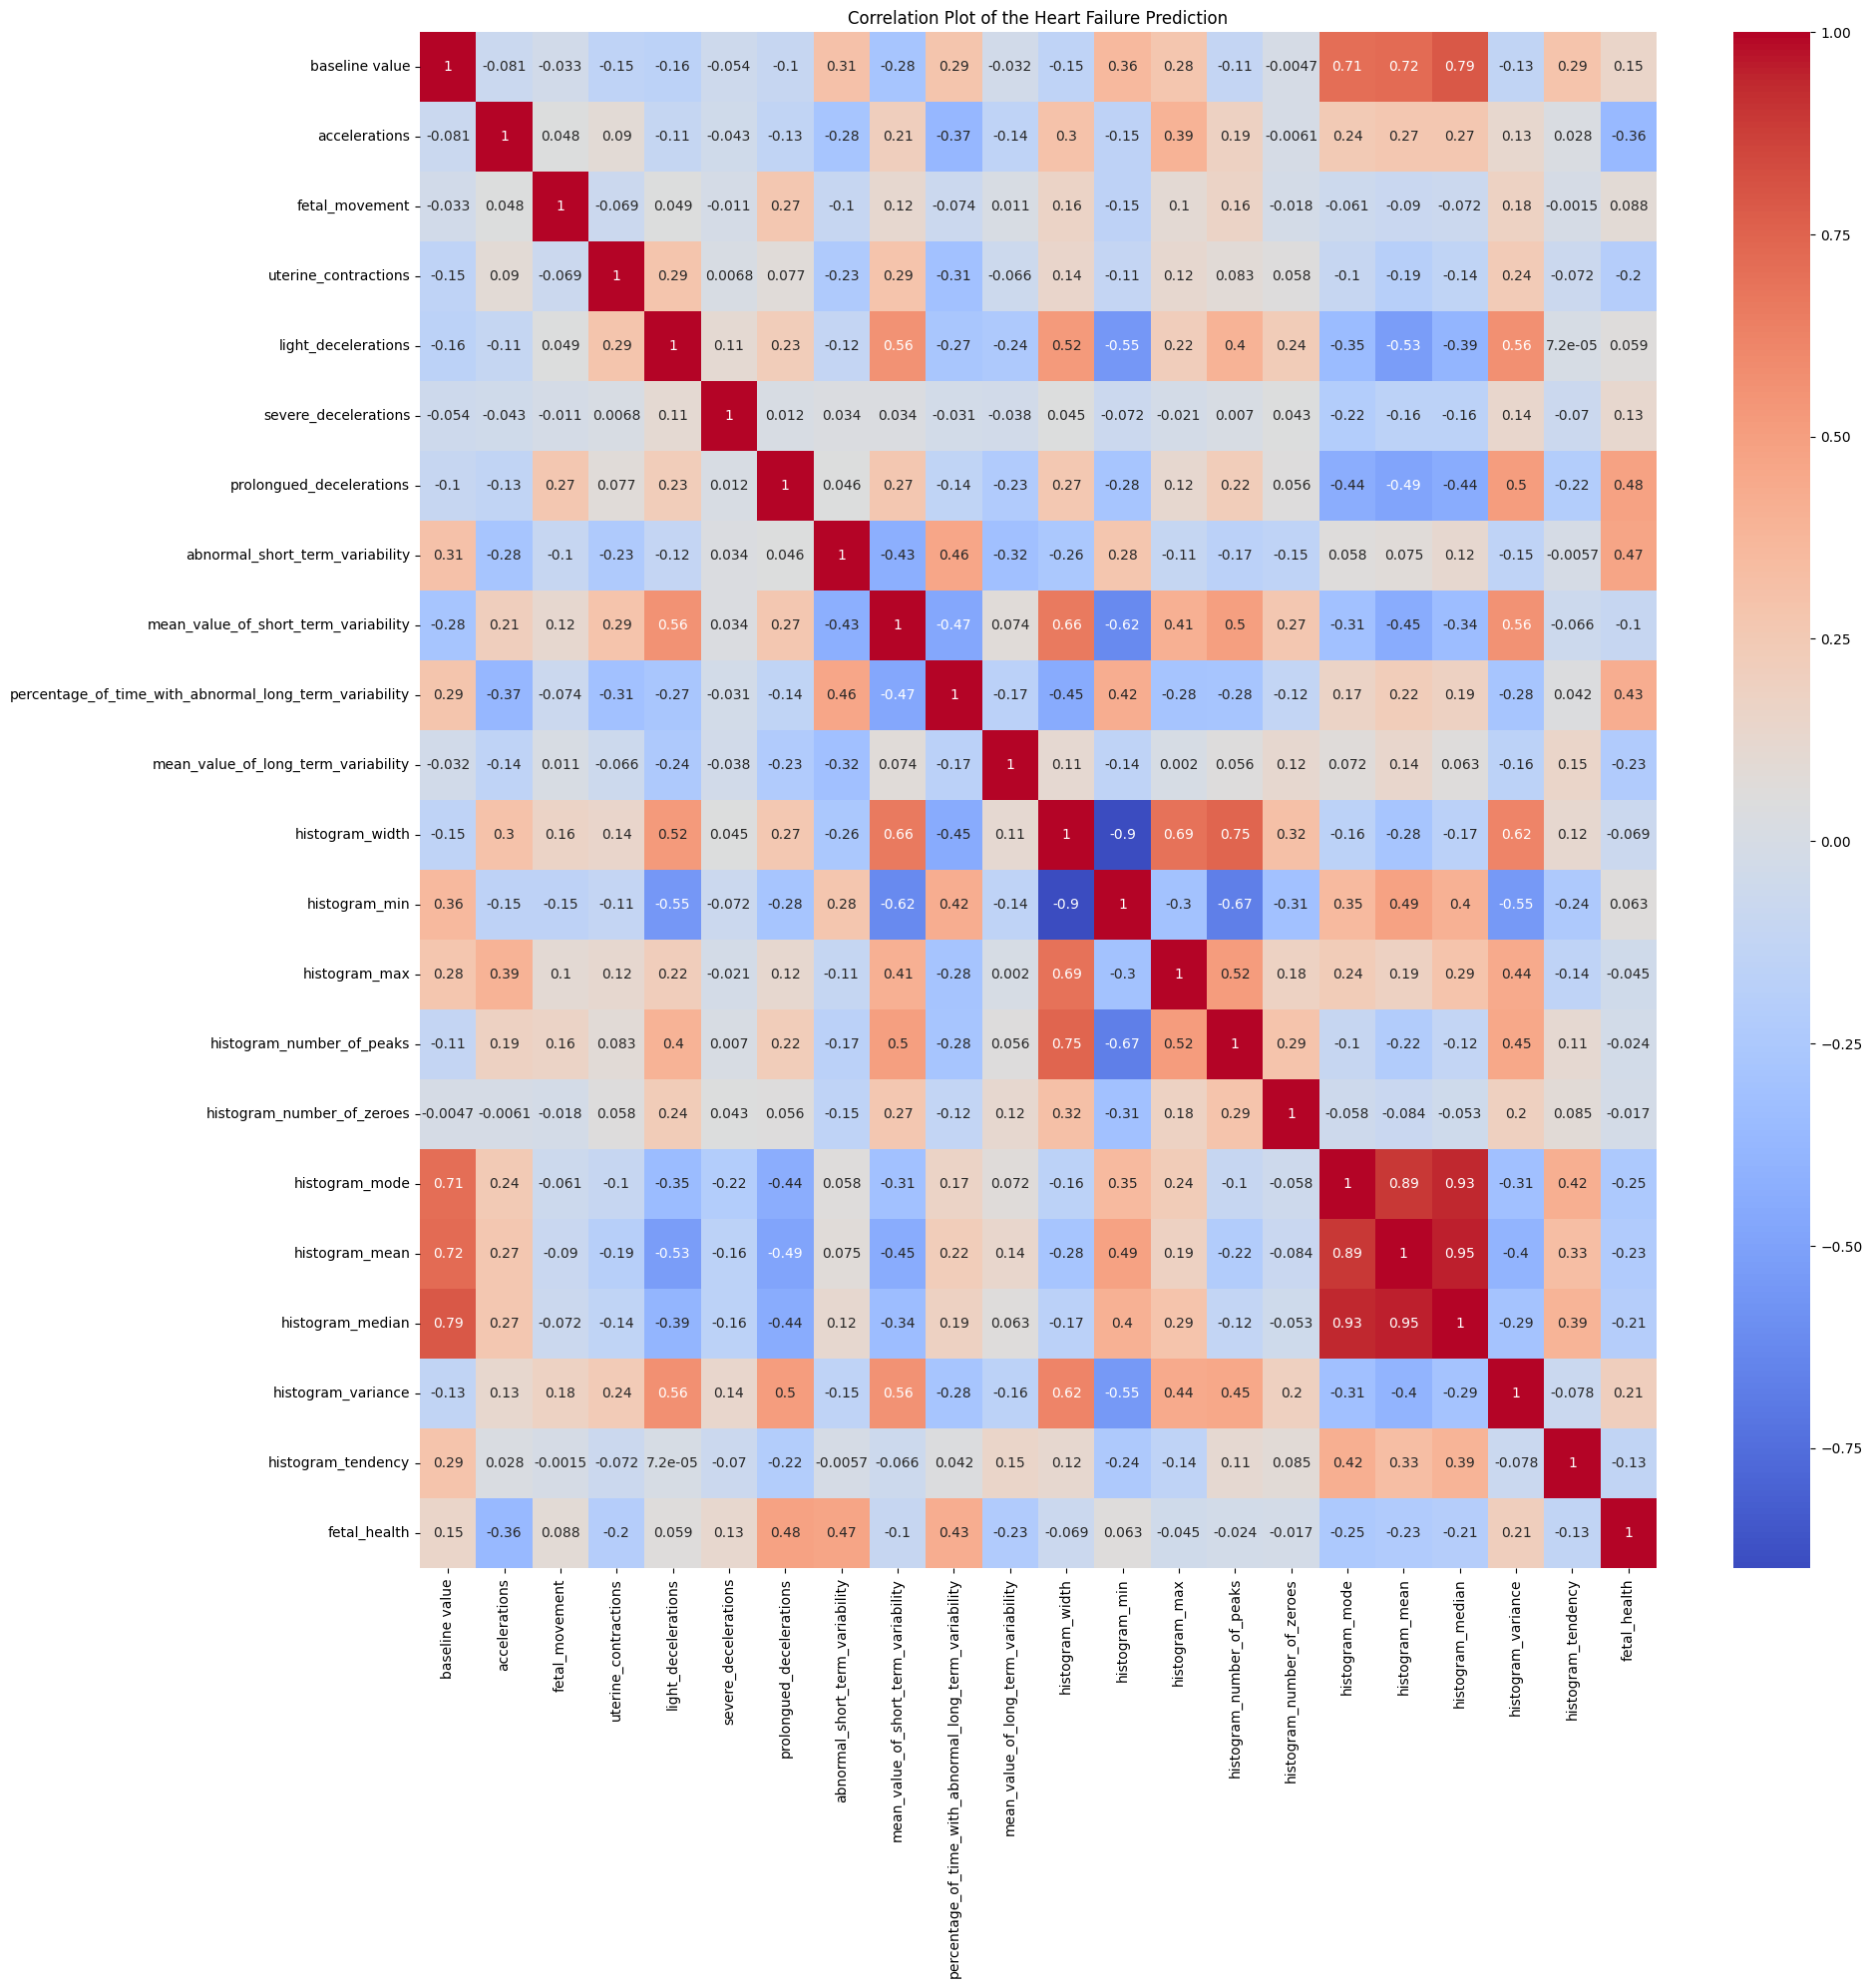

In [21]:
# Correlation Matrix
correlation_matrix = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.title("Correlation Plot of the Heart Failure Prediction")

plt.show()

### Data Preprocessing

In [22]:
# Print the count of null values in each column
print("Null Value Counts:")
print(df.isnull().sum())

Null Value Counts:
baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode       

Tidak terdapat null values pada dataset jadi tidak perlu dilakukan perubahan

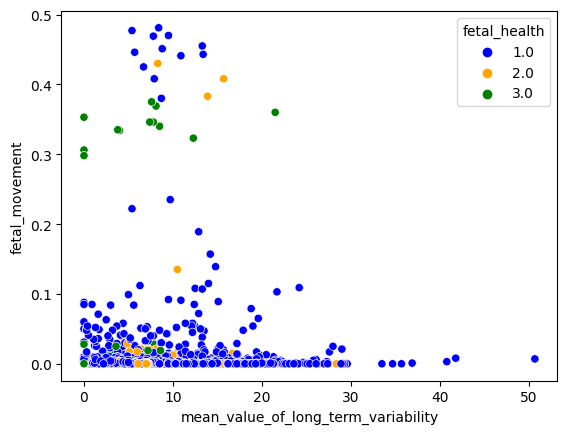

In [23]:
# Outlier check with plot
colours = ['blue', 'orange', 'green']

# Create the scatter plot
sns.scatterplot(data=df, x="mean_value_of_long_term_variability", y="fetal_movement", palette=colours, hue="fetal_health")

# Show the plot
plt.show()

Terlihat adanya outlier dalam dataset. Karena data diperoleh dari mesin CTG, keberadaan outlier mungkin memiliki signifikansi medis yang penting. Oleh karena itu, tidak perlu mengubah dataset untuk mengatasi outlier.

In [24]:
# Data Scaling
scaler = StandardScaler()
X = df.drop(["fetal_health"],axis=1)
y = df['fetal_health']

columns = list(X.columns)
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = columns)
X_scaled.describe()


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
count,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,...,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03
mean,1.069490e-15,-4.010589e-17,-1.336863e-17,-1.336863e-16,-5.347452e-17,6.684315e-18,1.336863e-17,-7.352747e-17,6.684315e-17,-5.347452e-17,...,-3.007942e-17,-4.679021e-17,-1.203177e-16,-1.671079e-16,2.757280e-17,1.069490e-16,-6.684315e-16,2.673726e-16,-5.347452e-17,-1.069490e-16
std,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,...,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00
min,-2.775197e+00,-8.223883e-01,-2.032096e-01,-1.482465e+00,-6.384375e-01,-5.747560e-02,-2.687543e-01,-2.035639e+00,-1.282833e+00,-5.353613e-01,...,-1.731757e+00,-1.474609e+00,-2.342558e+00,-1.379664e+00,-4.584438e-01,-4.729191e+00,-3.951945e+00,-4.223849e+00,-6.492081e-01,-2.162031e+00
25%,-7.423728e-01,-8.223883e-01,-2.032096e-01,-8.034341e-01,-6.384375e-01,-5.747560e-02,-2.687543e-01,-8.720881e-01,-7.166031e-01,-5.353613e-01,...,-8.587648e-01,-8.993760e-01,-6.703135e-01,-7.013968e-01,-4.584438e-01,-5.160773e-01,-6.164580e-01,-6.285137e-01,-5.801731e-01,-5.245255e-01
50%,-3.088439e-02,-3.048813e-01,-2.032096e-01,-1.244037e-01,-6.384375e-01,-5.747560e-02,-2.687543e-01,1.169297e-01,-1.503732e-01,-5.353613e-01,...,-7.563980e-02,-1.960840e-02,-1.128988e-01,-3.622634e-01,-4.584438e-01,9.451891e-02,8.912573e-02,6.289690e-02,-4.075856e-01,-5.245255e-01
75%,6.806040e-01,7.301328e-01,-1.389076e-01,8.941419e-01,3.752430e-01,-5.747560e-02,-2.687543e-01,8.150599e-01,4.158567e-01,6.270688e-02,...,7.588376e-01,8.939964e-01,5.559989e-01,6.551369e-01,-4.584438e-01,6.440555e-01,6.664215e-01,6.851664e-01,1.792117e-01,1.112980e+00
max,2.713428e+00,4.093929e+00,1.010654e+01,3.610264e+00,4.429965e+00,1.739869e+01,8.208570e+00,2.327675e+00,6.417893e+00,4.412293e+00,...,2.812936e+00,2.213648e+00,4.123453e+00,4.724738e+00,1.370800e+01,3.025381e+00,3.039749e+00,3.312527e+00,8.635997e+00,1.112980e+00


In [25]:
# Split the data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [26]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1700, 21), (426, 21), (1700,), (426,))

### Model Fit

In [27]:
models = {
    'Logistic_Regression': LogisticRegression(),
    'Random_forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier()
}

# Fit the models on the training data
for model_name, model in models.items():
    model.fit(X_train, y_train)
    
results = []

# Define StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Iterate through the models dictionary and perform Grid Search
for key, model in models.items():
    print("Model:", key)

    # Define the hyperparameters to search for each model
    param_grid = {}

    if key == 'Logistic_Regression':  # Logistic Regression
        param_grid = {
            'C': [0.001, 0.01, 0.1, 1, 10, 100],
            'max_iter': [1000, 1500, 2000],
            'solver': ['lbfgs', 'liblinear', 'sag', 'saga']
        }
    elif key == 'Random_forest':  # Random Forest
        param_grid = {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    elif key == 'KNN':  # K-Nearest Neighbors
        param_grid = {
            'n_neighbors': [3, 5, 7, 10],
            'weights': ['uniform', 'distance'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
        }

    # Initialize Grid Search with the model and hyperparameters
    grid_search = GridSearchCV(model, param_grid, cv=stratified_kfold, scoring='accuracy', verbose=1)

    # Perform Grid Search on the data
    grid_search.fit(X_train, y_train)

    # Get the best hyperparameters and model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Append results to the list
    results.append((key, best_model))

Model: Logistic_Regression
Fitting 5 folds for each of 72 candidates, totalling 360 fits


c:\Users\PANJIE\miniconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\PANJIE\miniconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\PANJIE\miniconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\PANJIE\miniconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\PANJIE\miniconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\PANJIE\miniconda3\envs\tf\lib\site-packages\sklearn

Model: Random_forest
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Model: KNN
Fitting 5 folds for each of 32 candidates, totalling 160 fits


### Evaluation

In [28]:
def evaluate_model(model, X_test, y_test):
    # Make predictions on the test set using the best model
    y_pred = model.predict(X_test)

    # Calculate and print accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("\n")

    # Calculate and print confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", cm)

    # Define target names for classification report
    target_names = ['Normal', 'Suspect', 'Pathological']

    # Generate classification report
    report = classification_report(y_test, y_pred, target_names=target_names)
    print("Classification Report:\n", report)

    return accuracy

# Initialize an empty list to store evaluation results
evaluation_results = []
    
# Evaluate each model and store results
for key, model in results:
    print("Model:", key)
    accuracy = evaluate_model(model, X_test, y_test)
    evaluation_results.append((key, accuracy))
    print("\n")

Model: Logistic_Regression
Accuracy: 0.8661971830985915


Confusion Matrix:
 [[310  20   3]
 [ 18  37   9]
 [  2   5  22]]
Classification Report:
               precision    recall  f1-score   support

      Normal       0.94      0.93      0.94       333
     Suspect       0.60      0.58      0.59        64
Pathological       0.65      0.76      0.70        29

    accuracy                           0.87       426
   macro avg       0.73      0.76      0.74       426
weighted avg       0.87      0.87      0.87       426



Model: Random_forest
Accuracy: 0.9553990610328639


Confusion Matrix:
 [[327   4   2]
 [ 10  53   1]
 [  1   1  27]]
Classification Report:
               precision    recall  f1-score   support

      Normal       0.97      0.98      0.97       333
     Suspect       0.91      0.83      0.87        64
Pathological       0.90      0.93      0.92        29

    accuracy                           0.96       426
   macro avg       0.93      0.91      0.92       426
wei

In [29]:
# Create a DataFrame from the evaluation results list
evaluation_df = pd.DataFrame(evaluation_results, columns=["Model", "Accuracy"])

# Sort the DataFrame by accuracy in descending order
evaluation_df = evaluation_df.sort_values(by="Accuracy", ascending=False)

# Set the "Model" column as the index
evaluation_df = evaluation_df.set_index("Model")

# Display the evaluation results
print(evaluation_df)

                     Accuracy
Model                        
Random_forest        0.955399
KNN                  0.927230
Logistic_Regression  0.866197
